# Homework 3: Data visualization

This homework assignment is designed to give you practice manipulating and visualizing data. 

You will need to download the **LexicalData.csv** and **Items.csv** files from the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). Unlike in the previous homework, there isn't any missing data in the **LexicalData.csv** file. 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## Loading the Data (1 point)

Use the `setwd` (or `system ("gdown")` if you're working in colab) and `read.csv` functions to load data from the **LexicalData.csv** and **Items.csv** files. Then, as in the previous homework, remove the commas from the reaction times and convert them from strings to numbers. Use `head` to look at the first few rows of each data frame. 

*Note: the `Freq_HAL` variable in **Items.csv** has a similar formatting issue, using string values with commas. We're not going to worry about fixing this since we're only using `Log_Freq_HAL`, which is the natural log transformation of `Freq_HAL`, in this homework.*

In [1]:
system("gdown --id 1q0toKETEbZf71Vb1e_iUKB1qplNFghCo") 
lexical_data = read.csv("LexicalData.csv") 

system("gdown --id 12Cx9lvoPb8AeGUWnJngofu4AXevxk45U")
items_data = read.csv("Items.csv")

head(lexical_data)
head(items_data)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


,Occurrences,Word,Length,Freq_HAL,Log_Freq_HAL
,<int>,<chr>,<int>,<chr>,<dbl>
1,1,synergistic,11,284,5.649
2,1,synonymous,10,951,6.858
3,1,syntactical,11,114,4.736
4,1,synthesis,9,"6,742",8.816
5,1,synthesized,11,"2,709",7.904
6,1,synthesizer,11,"1,390",7.237


## Reformatting the Data (1 points)

First you'll need to load the `tidyverse` library.

In [2]:
install.packages('broom')
source('https://gist.githubusercontent.com/jslefche/eff85ef06b4705e6efbc/raw/736d3dc9fe71863ea62964d9132fded5e3144ad7/theme_black.R')


library(tidyverse)
library(ggplot2)
library(broom)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



In [3]:
lexical_cData <- lexical_data %>% 
                              mutate(D_RT_new = gsub(',', '', D_RT) %>% 
                              as.numeric()) %>% 
                              filter(!is.na(D_RT_new), 
                                     D_RT_new >= 0)
head(lexical_cData)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,D_RT_new
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,157,1,1,710,browse,false,-0.437,710
2,67,1,1,"1,094",refrigerant,false,0.825,1094
3,120,1,1,587,gaining,false,-0.645,587
4,21,1,1,984,cheerless,false,0.025,984
5,236,1,1,577,pattered,false,-0.763,577
6,236,2,1,715,conjures,false,-0.364,715


 In order to get some insights about what characteristics of words make them easier to recognize, it would be useful to have reaction times and word characteristics in the same data frame. Add the `Length` and `Log_Freq_HAL` variables from the items data frame to the reaction times data frame using `left_join()`. You may want to use `select()` and the piping operator `%>%`, as well.

In [4]:
comb_data <- left_join(lexical_cData %>% 
                                  select(!D_RT), 
                       items_data %>% 
                                  select(Length, Log_Freq_HAL, Word),
                       by = c("D_Word" = "Word"))
head(comb_data)

,Sub_ID,Trial,Type,D_Word,Outlier,D_Zscore,D_RT_new,Length,Log_Freq_HAL
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1,157,1,1,browse,false,-0.437,710,6,8.856
2,67,1,1,refrigerant,false,0.825,1094,11,4.644
3,120,1,1,gaining,false,-0.645,587,7,8.304
4,21,1,1,cheerless,false,0.025,984,9,2.639
5,236,1,1,pattered,false,-0.763,577,8,1.386
6,236,2,1,conjures,false,-0.364,715,8,5.268


## Visualizing the Data (7 points)

Now, let's visualize some aspects of the data. For each of the following questions, use `ggplot2` to plot the data in a way that helps you answer the question. Then write a qualitative response to the question. **Keep in mind the 9 properties of graphical excellence as you make decisions for this section.**

*Question 1:* How are the reaction time values distributed?

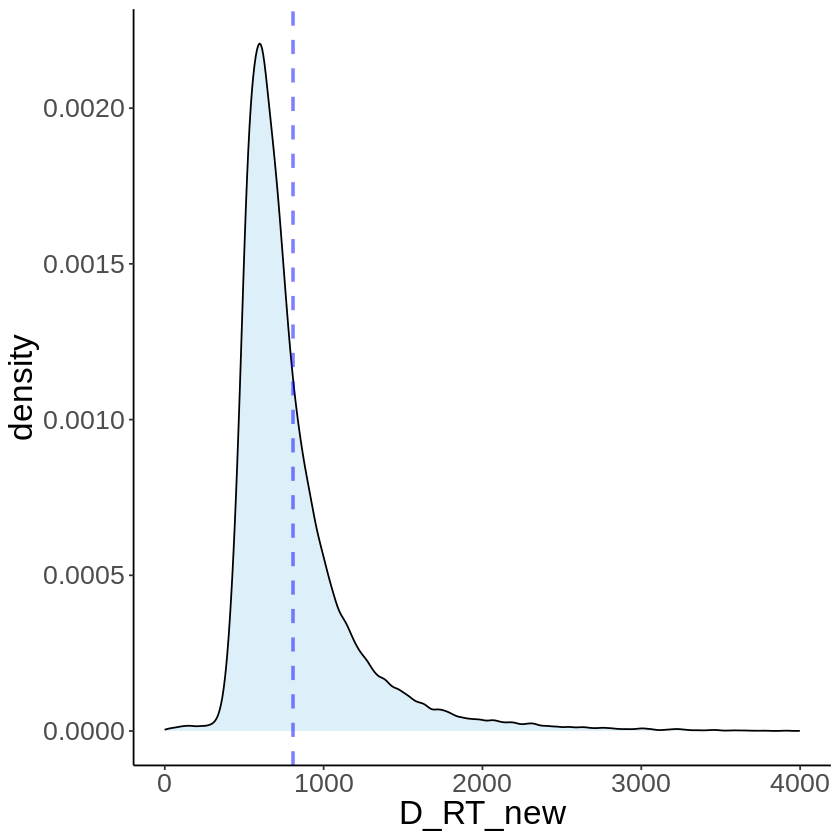

In [5]:
p <- ggplot(comb_data, aes(x=D_RT_new)) + 
 #geom_histogram(aes(y=..density..), color="darkblue", fill="lightblue") +
 geom_density(alpha = 0.2, fill="#56B4E9") 
p + geom_vline(aes(xintercept = mean(D_RT_new)),
            color = "blue", 
            linetype = "dashed", 
            size = 1, 
            alpha = 0.5) + 
    scale_color_grey() + 
    theme_classic() + 
    theme(text = element_text(size=20))

> *Write your response here.*


*Question 2:* Is there a relationship between word length and log frequency? If so, how would you describe it? 

`geom_smooth()` using formula 'y ~ x'



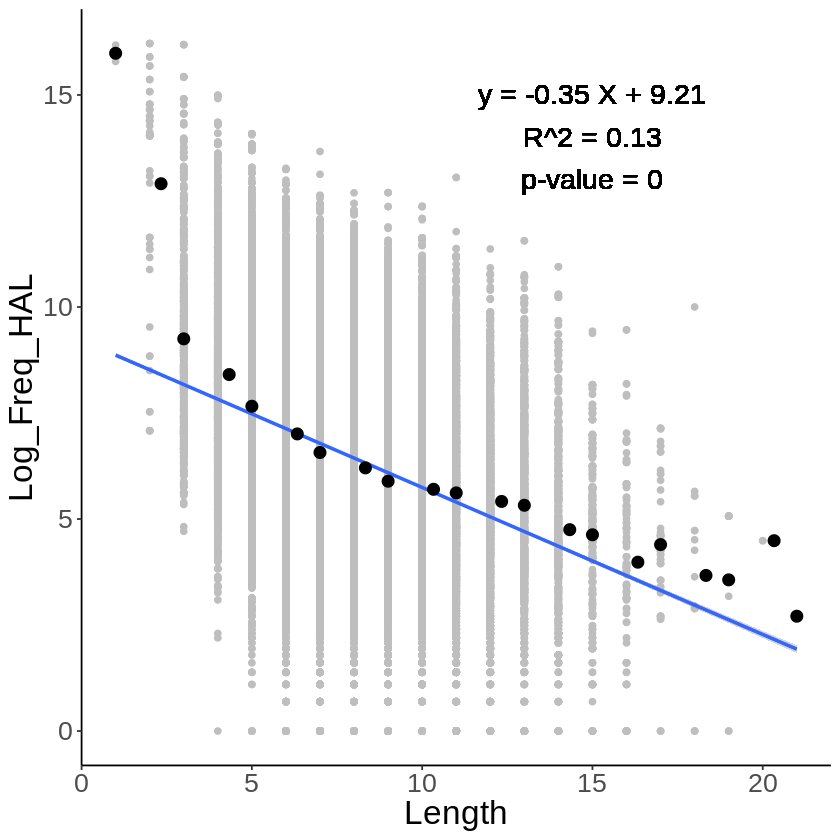

In [6]:
summ = summary(lm(comb_data$Log_Freq_HAL~comb_data$Length))
details = tidy(summ)

R_sqd <- summ$r.squared %>% round(digits = 2)
b1_hat <- details$estimate[1] %>% round(digits = 2)
x_hat <- details$estimate[2] %>% round(digits = 2)
p_val <- details$p.value[2] %>% round(digits = 2)

formula_txt = paste0('y = ', x_hat, ' X', ' + ', b1_hat)
rsq_txt = paste0("R^2 = ", R_sqd)
pval_txt = paste0('p-value = ', p_val)

ggplot(comb_data, aes(x=Length, y=Log_Freq_HAL)) + 
  geom_point(color = 'gray') +
  geom_smooth(method=lm) +
  stat_summary_bin(fun = "mean", geom = "point", orientation = 'x', size=3) +
  geom_text(x=15, y=15, label=formula_txt, size=6) +
  geom_text(x=15, y=14, label=rsq_txt, size=6) +
  geom_text(x=15, y=13, label=pval_txt, size=6) +
  scale_color_grey() + 
  theme_classic() +
  theme(text = element_text(size=20))

> *Write your response here.*


*Question 3:* What is the relationship between log word frequency and lexical decision reaction time? (hint: binning frequency and using `stat_summary` may be helpful)

`geom_smooth()` using formula 'y ~ x'



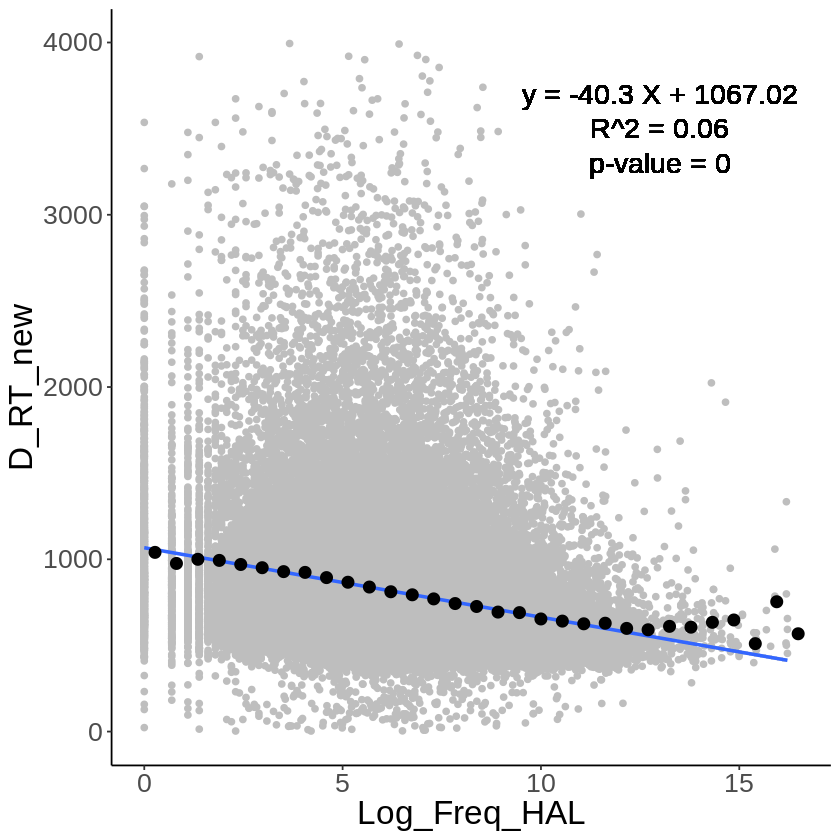

In [9]:
summ = summary(lm(comb_data$D_RT_new~comb_data$Log_Freq_HAL))
details = tidy(summ)

R_sqd <- summ$r.squared %>% round(digits = 2)
b1_hat <- details$estimate[1] %>% round(digits = 2)
x_hat <- details$estimate[2] %>% round(digits = 2)
p_val <- details$p.value[2] %>% round(digits = 2)

formula_txt = paste0('y = ', x_hat, ' X', ' + ', b1_hat)
rsq_txt = paste0("R^2 = ", R_sqd)
pval_txt = paste0('p-value = ', p_val)

ggplot(comb_data, aes(Log_Freq_HAL, D_RT_new)) +
  geom_point(color = 'gray') +
  geom_smooth(method=lm) +
  stat_summary_bin(fun = "mean", geom = "point", orientation = 'x', size=3) +
  geom_text(x=13, y=3700, label=formula_txt, size=6) +
  geom_text(x=13, y=3500, label=rsq_txt, size=6) +
  geom_text(x=13, y=3300, label=pval_txt, size=6) +
  scale_color_grey() + 
  theme_classic() +
  theme(text = element_text(size=20))

> *Write your response here.*


*Question 4:* Is the overall relationship between log word frequency and lexical decision reaction time different for short words versus long words? (hint: try binning both length and frequency)

`geom_smooth()` using formula 'y ~ x'



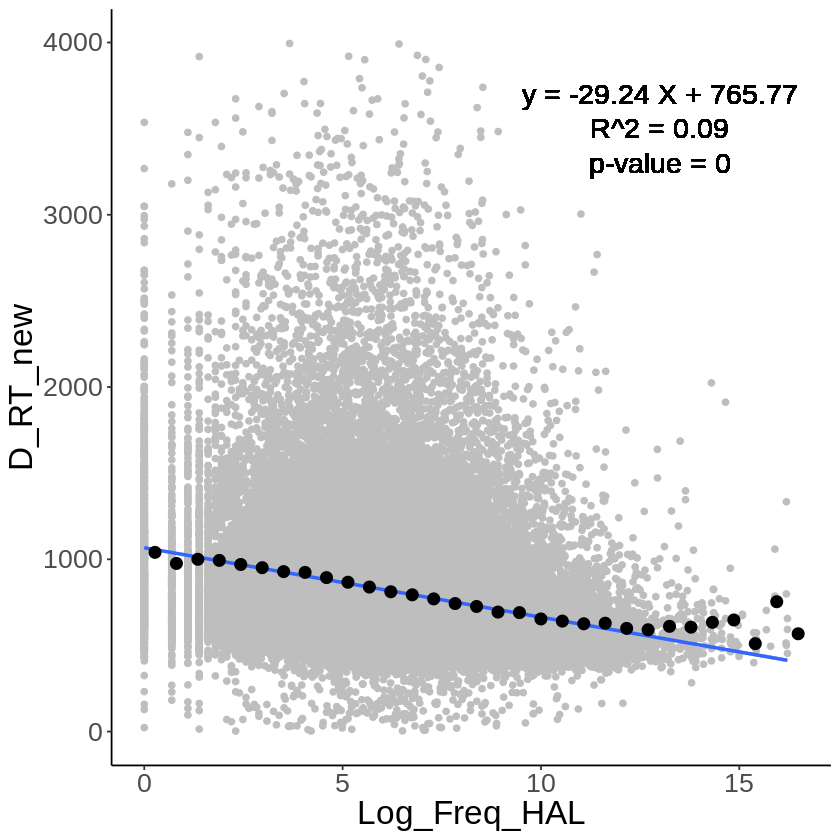

In [11]:
summ = summary(lm(comb_data$D_RT_new~comb_data$Log_Freq_HAL))
details = tidy(summ)

R_sqd <- summ$r.squared %>% round(digits = 2)
b1_hat <- details$estimate[1] %>% round(digits = 2)
x_hat <- details$estimate[2] %>% round(digits = 2)
p_val <- details$p.value[2] %>% round(digits = 2)

formula_txt = paste0('y = ', x_hat, ' X', ' + ', b1_hat)
rsq_txt = paste0("R^2 = ", R_sqd)
pval_txt = paste0('p-value = ', p_val)

ggplot(comb_data, aes(Log_Freq_HAL, D_RT_new)) +
  geom_point(color = 'gray') +
  geom_smooth(method=lm) +
  stat_summary_bin(fun = "mean", geom = "point", orientation = 'x', size=3) +
  geom_text(x=13, y=3700, label=formula_txt, size=6) +
  geom_text(x=13, y=3500, label=rsq_txt, size=6) +
  geom_text(x=13, y=3300, label=pval_txt, size=6) +
  scale_color_grey() + 
  theme_classic() +
  theme(text = element_text(size=20))

> *Write your response here.*

## Reflection (1 point)
How might you approach analyzing this data differently after the insights you gained from these visualizations? 

> *Write your response here.* 

**DUE:** 5pm EST, March 4, 2021

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*